In [1]:
from __future__ import division
import os,sys

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

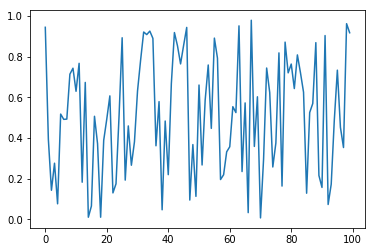

In [3]:
import numpy as np
x=np.random.rand(100)
plt.plot(x)

In [4]:
from statsmodels.tsa.stattools import adfuller as ADF
print("ADF平稳性检验结果为：",ADF(x))

ADF平稳性检验结果为： (-5.367850755390383, 3.955649644715307e-06, 5, 94, {'10%': -2.583453861475781, '5%': -2.892815255482889, '1%': -3.5019123847798657}, 33.622418004450424)


In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("白噪声检验结果为:",acorr_ljungbox(x,lags=1))

白噪声检验结果为: (array([1.4255741]), array([0.23248811]))


F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


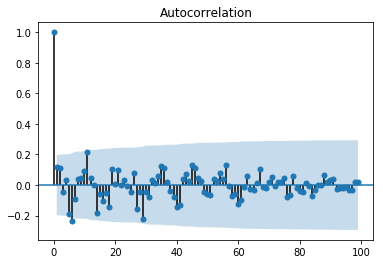

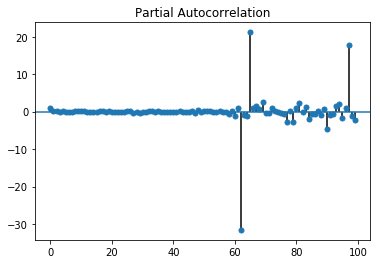

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(x).show()
plot_pacf(x).show()

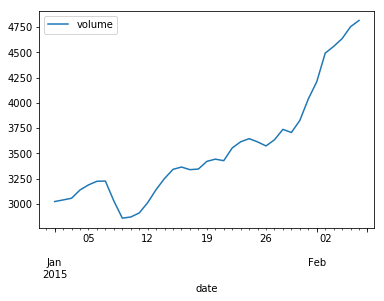

In [14]:
import pandas as pd 
data=pd.read_csv('data9/arima_data.csv',index_col='date')
data.index=pd.to_datetime(data.index)
data.plot()
plt.show()

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


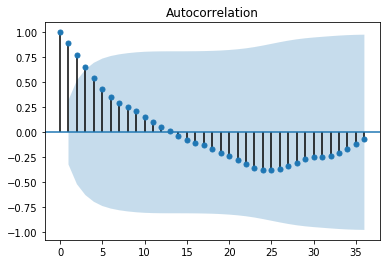

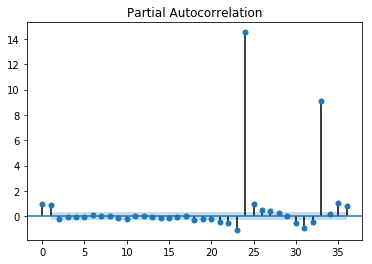

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data).show()
plot_pacf(data).show()

In [19]:
from statsmodels.tsa.stattools import adfuller as ADF
print("原始序列的ADF检验结果为：",ADF(data['volume']))

原始序列的ADF检验结果为： (1.813771015094526, 0.9983759421514264, 10, 26, {'10%': -2.6300945562130176, '5%': -2.981246804733728, '1%': -3.7112123008648155}, 299.46989866024177)


In [20]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("原始序列的白噪声检验结果为：",acorr_ljungbox(data['volume'],lags=1))

原始序列的白噪声检验结果为： (array([32.0111333]), array([1.53291527e-08]))


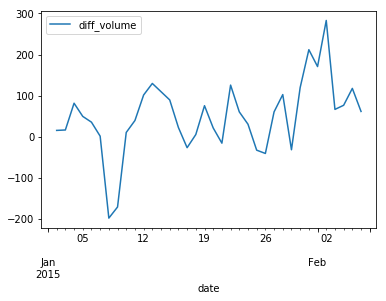

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


差分序列的ADF检验结果为： (-3.1560562366723537, 0.022673435440048798, 0, 35, {'10%': -2.6130173469387756, '5%': -2.9485102040816327, '1%': -3.6327426647230316}, 287.5909090780334)


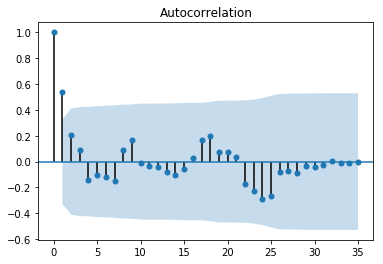

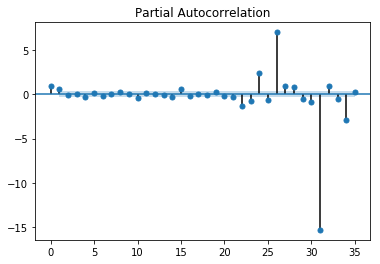

In [23]:
D_data=data.diff().dropna()
D_data.columns=['diff_volume']
D_data.plot();plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D_data).show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()

print("差分序列的ADF检验结果为：",ADF(D_data['diff_volume']))

In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("差分序列的白噪声检验结果为：",acorr_ljungbox(D_data['diff_volume'],lags=1))

差分序列的白噪声检验结果为： (array([11.30402222]), array([0.00077339]))


In [32]:
from statsmodels.tsa.arima_model import ARIMA

pmax=int(len(D_data)/10)
qmax=int(len(D_data)/10)

data['volume']=data['volume'].astype(float)

bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)
    
bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)

p,q=bic_matrix.stack().idxmin()
print('BIC最小的p值和q值为：%s、%s'%(p,q))

F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site

            0           1           2           3
0  432.068472  422.510082  426.088911  426.595507
1  423.628276  426.073601         NaN         NaN
2  426.774824  427.395821         NaN         NaN
3  430.317524         NaN         NaN  436.478109
BIC最小的p值和q值为：0、1


In [33]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data,(p,1,q)).fit()
resid=model.resid

F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


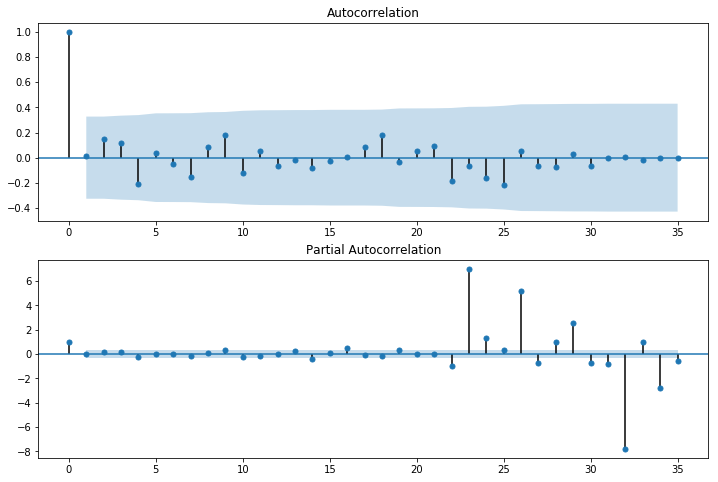

In [34]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(resid.values.squeeze(),lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(resid,lags=35,ax=ax2)

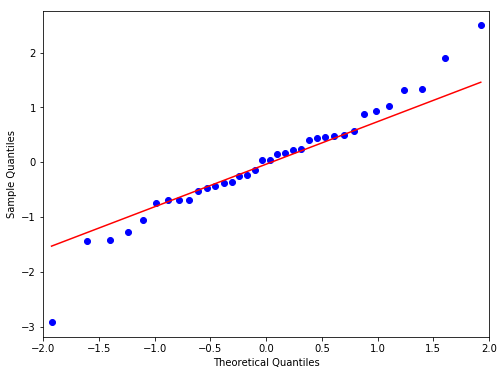

In [35]:
from statsmodels.graphics.api import qqplot
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
fig=qqplot(resid,line='q',ax=ax,fit=True)

In [36]:
from statsmodels.tsa.stattools import acf as ACF
r1,q1,p1=ACF(resid.values.squeeze(),qstat=True)
tmp=np.c_[list(range(1,36)),r1[1:],q1,p1]
table=pd.DataFrame(tmp,columns=['lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag')[:15])

            AC         Q  Prob(>Q)
lag                               
1.0   0.009995  0.003905  0.950176
2.0   0.151097  0.922486  0.630500
3.0   0.119393  1.513403  0.679180
4.0  -0.212564  3.445001  0.486290
5.0   0.034075  3.496238  0.623957
6.0  -0.053348  3.626018  0.727135
7.0  -0.157088  4.790082  0.685563
8.0   0.082868  5.125587  0.744073
9.0   0.180436  6.775151  0.660516
10.0 -0.119683  7.528820  0.674754
11.0  0.051306  7.672861  0.742274
12.0 -0.062678  7.896789  0.793143
13.0 -0.020659  7.922174  0.848633
14.0 -0.078650  8.306819  0.872737
15.0 -0.024755  8.346738  0.909130


In [37]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("残差的白噪声检验结果为：",acorr_ljungbox(resid,lags=1))


残差的白噪声检验结果为： (array([0.00390451]), array([0.95017574]))


In [38]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 422.5101  
Dependent Variable: D.volume         Log-Likelihood:      -205.88   
Date:               2018-10-22 14:45 Scale:               1.0000    
No. Observations:   36               Method:              css-mle   
Df Model:           2                Sample:              01-02-2015
Df Residuals:       34                                    02-06-2015
Converged:          1.0000           S.D. of innovations: 73.086    
No. Iterations:     15.0000          HQIC:                419.418   
AIC:                417.7595                                        
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             49.9564   20.1390  2.4806  0.0182  10.4847  89.4281
ma.L1.D.volume     0.6710    0.1648  4.0712  0.0003   0.3480   0.9941
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
MA.1           -1.4902             0.0000           1.4902             0.5000
====================================================================

"""

In [39]:
forecastnum=5
model.forecast(forecastnum)

(array([4873.9667493 , 4923.92317644, 4973.87960359, 5023.83603073,
        5073.79245787]),
 array([ 73.08574293, 142.32679918, 187.542821  , 223.80281869,
        254.95704265]),
 array([[4730.72132537, 5017.21217324],
        [4644.96777602, 5202.87857687],
        [4606.30242887, 5341.4567783 ],
        [4585.19056646, 5462.48149499],
        [4574.08583666, 5573.49907907]]))

In [40]:
model.forecast(forecastnum,alpha=0.01)

(array([4873.9667493 , 4923.92317644, 4973.87960359, 5023.83603073,
        5073.79245787]),
 array([ 73.08574293, 142.32679918, 187.542821  , 223.80281869,
        254.95704265]),
 array([[4685.71035099, 5062.22314762],
        [4557.31363644, 5290.53271645],
        [4490.80130958, 5456.95789759],
        [4447.35817213, 5600.31388932],
        [4417.06663626, 5730.51827947]]))

In [ ]:
#实例2 苹果股票价格预测

In [42]:
import pandas as pd
import numpy as np
from pandas_datareader import data
stock=data.get_data_yahoo('AAPL',start='2016/7/1',end='2016/12/31')
out_file=open('data9/aapl2016-2.csv','w')
stock.to_csv(out_file)
out_file.close()

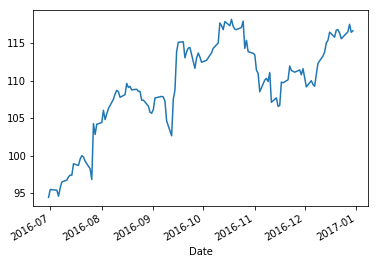

In [51]:
import pandas as pd
data=pd.read_csv('data9/aapl2016-2.csv',index_col='Date')
data.index=pd.to_datetime(data.index)
data['Open'].plot()
plt.show()

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


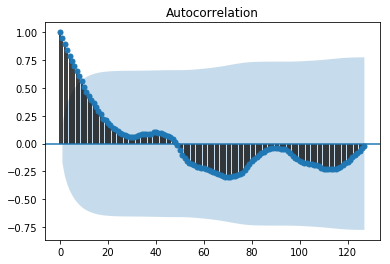

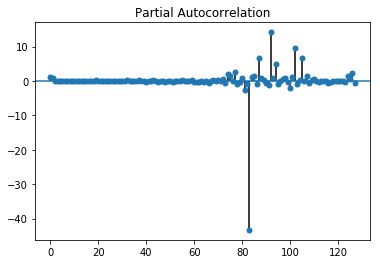

In [52]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Open']).show()
plot_pacf(data['Open']).show()

In [53]:
from statsmodels.tsa.stattools import adfuller as ADF
print("原始序列的ADF检验结果为：",ADF(data['Open']))

原始序列的ADF检验结果为： (-2.193183161680527, 0.20872887258194878, 0, 127, {'10%': -2.5790575441750883, '5%': -2.884580323367261, '1%': -3.482920063655088}, 412.6150501075729)


In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("原始序列的白噪声检验结果为：",acorr_ljungbox(data['Open'],lags=1))


原始序列的白噪声检验结果为： (array([116.89539636]), array([3.02614415e-27]))


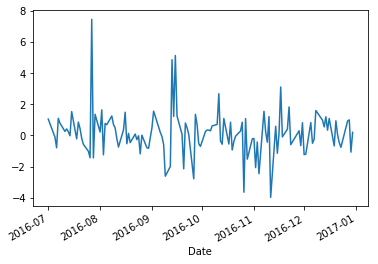

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


差分序列的ADF检验结果为： (-12.46399817167489, 3.357089307435086e-23, 0, 126, {'10%': -2.5791564575459813, '5%': -2.8847655969877666, '1%': -3.4833462346078936}, 413.7702884653162)


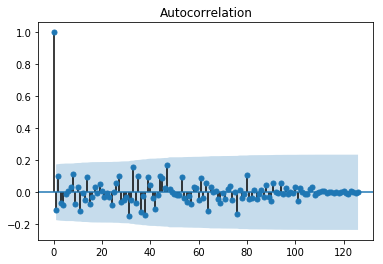

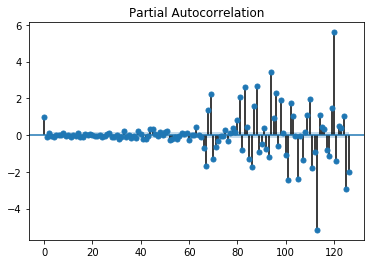

In [56]:
D_data=data['Open'].diff().dropna()
D_data.columns=['diff_open']
D_data.plot();plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D_data).show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()

print("差分序列的ADF检验结果为：",ADF(D_data))

In [57]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print("差分序列的白噪声检验结果为：",acorr_ljungbox(D_data,lags=1))


差分序列的白噪声检验结果为： (array([1.5941726]), array([0.206731]))


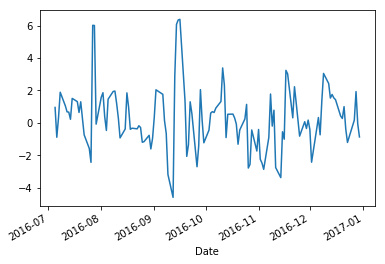

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


二阶差分序列的ADF检验结果为： (-3.5665371045196235, 0.006433950890073581, 7, 118, {'10%': -2.580009026141913, '5%': -2.8863625166643136, '1%': -3.4870216863700767}, 428.58125051361935)
二阶差分序列的白噪声检验结果为： (array([31.63447239]), array([1.86096631e-08]))


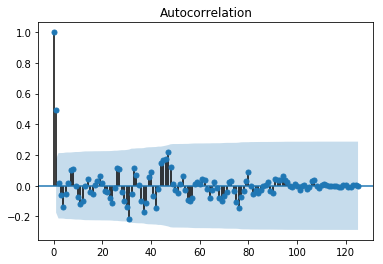

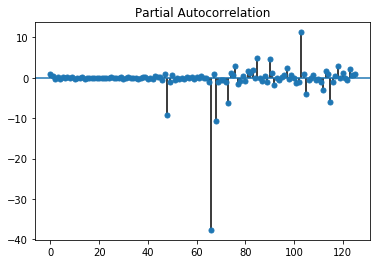

In [59]:
D_data=data['Open'].diff(periods=2).dropna()
D_data.columns=['diff_open']
D_data.plot();plt.show()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(D_data).show()

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()

print("二阶差分序列的ADF检验结果为：",ADF(D_data))

from statsmodels.stats.diagnostic import acorr_ljungbox
print("二阶差分序列的白噪声检验结果为：",acorr_ljungbox(D_data,lags=1))


In [60]:
from statsmodels.tsa.arima_model import ARIMA

pmax=3
qmax=3
data['Open']=data['Open'].astype(float)

bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(data['Open'],(p,2,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix=pd.DataFrame(bic_matrix)
print(bic_matrix)

p,q=bic_matrix.stack().idxmin()
print('BIC最小的p值和q值为：%s、%s'%(p,q))

F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


            0           1           2           3
0  557.657099  466.260878         NaN         NaN
1  507.509966  469.603665  473.606551  477.869507
2  501.993831  473.311678  478.825883  480.444174
3  502.908951  477.897191  482.785724  484.960661
BIC最小的p值和q值为：0、1


In [61]:
train=data[:-5]['Open']
test=data[-5:]['Open']

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,(p,1,q)).fit()
forecastnum=5
yHat=model.forecast(forecastnum,alpha=0.01)

F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [62]:
print(yHat[0])
print(test)

[116.58784553 116.76728265 116.94671976 117.12615687 117.30559398]
Date
2016-12-23    115.589996
2016-12-27    116.519997
2016-12-28    117.519997
2016-12-29    116.449997
2016-12-30    116.650002
Name: Open, dtype: float64


In [63]:
def RMSE(yArr,yHatArr):
    import numpy as np
    return np.sqrt(((yArr-yHatArr)**2).sum()/len(yArr))

In [64]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yHat[0],test))

0.4544986953493931


In [65]:
RMSE(test,yHat[0])

0.6741651840234655

In [66]:
def absError(yArr,yHatArr):
    return abs(yArr-yHatArr).sum()/len(yArr)

In [67]:
absError(test,yHat[0])

0.6300328917325515

In [ ]:
#实例3

            sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


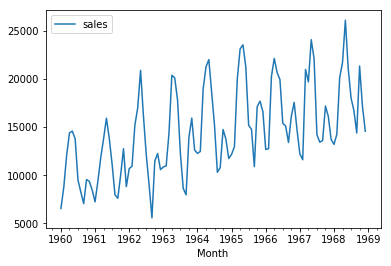

In [69]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=pd.read_csv('data9/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']
print(data.head())
data.plot()

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=pd.read_csv('data9/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']

D_data=data.diff(12).dropna()
D_data.to_csv('data9/seasonally_adjusted.csv')
D_data.plot()

PermissionError: [Errno 13] Permission denied: 'data9/seasonally_adjusted.csv'

F:\Anaconda\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


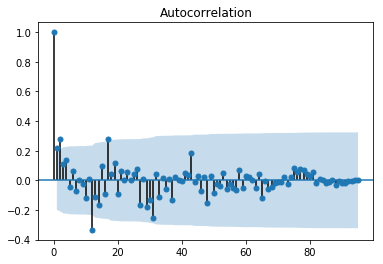

In [72]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

D_data=pd.read_csv('data9/seasonally_adjusted.csv',index_col='Month')
D_data.index=pd.to_datetime(D_data.index)
plot_acf(D_data).show()

In [74]:
import pandas as pd
D_data =pd.read_csv('data9/seasonally_adjusted.csv',index_col='Month')
D_data.index=pd.to_datetime(D_data.index)
S_data=pd.DataFrame()
for i in range(12,0,-1):
    S_data['t-'+str(i)]=D_data['sales'].shift(i)
S_data['t']=D_data.values
S_data=S_data[13:]
S_data.to_csv('data9/lags_12months_features01.csv',index=False)

print(S_data.head())

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Month                                                                        
1962-02-01   646.0  -189.0  -611.0  1339.0    30.0  1645.0  -276.0   561.0   
1962-03-01  -189.0  -611.0  1339.0    30.0  1645.0  -276.0   561.0   470.0   
1962-04-01  -611.0  1339.0    30.0  1645.0  -276.0   561.0   470.0  3395.0   
1962-05-01  1339.0    30.0  1645.0  -276.0   561.0   470.0  3395.0   360.0   
1962-06-01    30.0  1645.0  -276.0   561.0   470.0  3395.0   360.0  3440.0   

               t-4     t-3     t-2     t-1       t  
Month                                               
1962-02-01   470.0  3395.0   360.0  3440.0  1573.0  
1962-03-01  3395.0   360.0  3440.0  1573.0  3363.0  
1962-04-01   360.0  3440.0  1573.0  3363.0  3226.0  
1962-05-01  3440.0  1573.0  3363.0  3226.0  4974.0  
1962-06-01  1573.0  3363.0  3226.0  4974.0  2384.0  


滞后观察值的重要性得分：
[0.220692   0.06444966 0.05597269 0.03637144 0.06798764 0.10012901
 0.08632594 0.05120944 0.10782591 0.0422795  0.10044342 0.06631336]


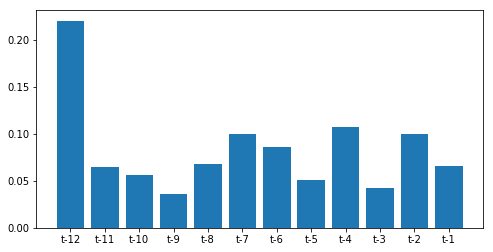

In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt

S_data=pd.read_csv('data9/lags_12months_features.csv',header=0)
array=S_data.values
X=array[:,0:-1]
y=array[:,-1]

model=RandomForestRegressor(n_estimators=50,random_state=1)
model.fit(X,y)

print("滞后观察值的重要性得分：")
print(model.feature_importances_)

names=S_data.columns.values[0:-1]
ticks=[i for i in range(len(names))]
plt.rc('figure',figsize=(8,4))
plt.bar(ticks,model.feature_importances_)
plt.xticks(ticks,names)
plt.show()

Selected Features:
t-12
t-6
t-4
t-2


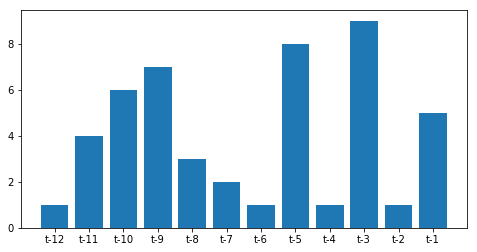

In [83]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

S_data=pd.read_csv('data9/lags_12months_features.csv',header=0)
array=S_data.values
X=array[:,0:-1]
y=array[:,-1]

rfe=RFE(RandomForestRegressor(n_estimators=500,random_state=1),4)
fit=rfe.fit(X,y)

print('Selected Features:')
names=S_data.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print((names[i]))
plt.rc('figure',figsize=(8,4))
ticks=[i for i in range(len(names))]
plt.bar(ticks,fit.ranking_)
plt.xticks(ticks,names)
plt.show()

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data=pd.read_csv('data9/car-sales.csv',header=0,index_col='Month')
data.index=pd.to_datetime(data.index)
data.columns=['sales']

D_data=data.diff(12).dropna()


In [86]:
D_data.tail()

,sales
Month,
1968-08-01,3288.0
1968-09-01,787.0
1968-10-01,4155.0
1968-11-01,1061.0
1968-12-01,864.0


In [88]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(D_data,(7,0,0)).fit(trend='nc',disp=0)
print(model.summary2())


F:\Anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 1737.5227 
Dependent Variable: sales            Log-Likelihood:      -850.50   
Date:               2018-10-22 19:04 Scale:               1.0000    
No. Observations:   96               Method:              css-mle   
Df Model:           7                Sample:              01-01-1961
Df Residuals:       89                                    12-01-1968
Converged:          1.0000           S.D. of innovations: 1698.179  
No. Iterations:     8.0000           HQIC:                1725.300  
AIC:                1717.0079                                       
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
ar.L1.sales    0.2395     0.1013    2.3635   0.0203    0.0409   0.4381
ar.L2.sales    0.2635     0.1034    2.5486   0.0125   

In [89]:
def RMSE(yArr,yHatArr):
    import numpy as np
    return np.sqrt(((yArr-yHatArr)**2).sum()/len(yArr))


In [90]:
train,test=D_data[D_data.index<'1968'],D_data['1968']
years=['1967','1966','1965','1964','1963','1962','1961']

In [92]:
rmseList=list()
for year in years:
    dataset=train[train.index>=year]
    values=dataset.values
    history=[values[i] for i in range(len(values))]
    predictions=list()
    test_values=test.values
    for t in range(len(test_values)):
        model=ARIMA(history,order=(1,0,0)).fit(trend='nc',disp=0)
        yhat=model.forecast()[0]
        predictions.append(yhat)
        history.append(test_values[t])
    rmse=RMSE(test_values,predictions)
    rmseList.append(rmse)
    print(('%s-%s(%d values)RMSE:%.3f'%(years[0],year,len(values),rmse)))

1967-1967(12 values)RMSE:7982.411
1967-1966(24 values)RMSE:7690.509


F:\Anaconda\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1967-1965(36 values)RMSE:7148.796
1967-1964(48 values)RMSE:7065.854
1967-1963(60 values)RMSE:7061.616
1967-1962(72 values)RMSE:7022.937
1967-1961(84 values)RMSE:7032.900


In [93]:
print(rmseList)

[7982.410568337648, 7690.508593634495, 7148.795710706611, 7065.854125002841, 7061.616051231144, 7022.937055681201, 7032.899529542889]


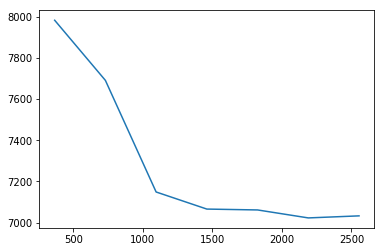

In [94]:
from matplotlib import pyplot
x=[365,730,1095,1460,1825,2190,2555]
pyplot.plot(x,rmseList)
pyplot.show()